In [428]:
import re

### Task 1

In [429]:
pattern_1 = r"(ftp[.][\w+|.|/|#]*)"
ftps = open('ftps.txt', 'w')
with open("references.txt") as input_file:
    line = "line"
    while len(line) != 0:
        line = input_file.readline()
        match = re.findall(pattern_1, line)
        if match != []:
            c += len(match)
            ftps.write('\n'.join(match))
ftps.close()            

### Task 2-5

In [430]:
import seaborn as sns

In [431]:
#all numbers from the text will be written here
numbers = ''

#all with-a-words will be here
a_words = ''

#all sentences with ! end will be here
exc_sentences = ''

#all unique words and len-s will be here
unique_len = {}
unique_words = set()

with open("2430AD.txt") as input_file:
    line = "line"
    while len(line) != 0:
        line = input_file.readline()
        
        #numbers
        match_num = re.findall(r"(\d+)", line)
        if match_num != []:
            numbers += '\n'.join(match_num) + '\n'
        
        #all words with a
        match_a = re.findall(r"[a-zA-Z]*[a][a-zA-Z]*", line)
        if match_a != []:
            a_words += '\n'.join(match_a) + '\n'
        

        #all sentences with !
        s = re.sub(r'\s+', ' ', line)
        for s in re.split(r'(?<=[.!?…])', s):
            match_exc = re.findall(r'[^"^ ].*[!].*', s)
            if match_exc != []:
                exc_sentences += "\n".join(match_exc) + '\n'

        #unique words
        words = re.findall(r"\w+", line.lower())        
        if words != []:
            for w in words:
                if w not in unique_words:
                    unique_words.add(w)
                    if len(w) not in unique_len.keys():
                        unique_len.update({len(w): 1})
                    else:
                        unique_len[len(w)] += 1

In [432]:
print(numbers)

2430
1969
2430
2430
57
57
1970
3
68
35
460
2430



In [433]:
print(a_words)

and
dawn
and
all
ache
have
a
nightmare
a
are
all
and
a
gleam
anywhere
an
original
a
personality
packed
talk
said
Alvarez
said
Social
eventually
character
escaped
adjustment
talking
irritates
past
tact
along
Trail
was
as
always
sparsely
have
taken
and
Alvarez
walking
Alvarez
was
tall
and
rather
athletic
a
muscular
activities
stairs
and
rampways
instance
almost
an
character
and
avoided
sunlamps
and
was
pale
said
want
can
have
square
space
and
has
apartment
Rather
a
a
way
said
Alvarez
a
Alvarez
added
matter
reach
peak
reach
reach
goal
mankind
said
at
that
way
that
against
plastic
passed
and
saw
distance
was
a
plankton
varieties
almost
that
above
far
above
was
giant
leading
sea
another
as
large
far
leading
sea
destination
was
a
back
that
thousands
had
passed
was
about
an
intangible
and
space
wall
was
blank
was
air
said
Alvarez
Inhuman
Literally
said
at
easy
signaled
waited
all
around
disregarded
manner
was
always
Cranwitz
was
waiting
same
all
gray
hair
and
uneasily
May
asked
Alvarez
Cranwi

In [434]:
print(exc_sentences)

Yes!
Literally!
There was once a time!
Centuries ago!
Think, Cranwitz!
If we succeed!



<AxesSubplot: >

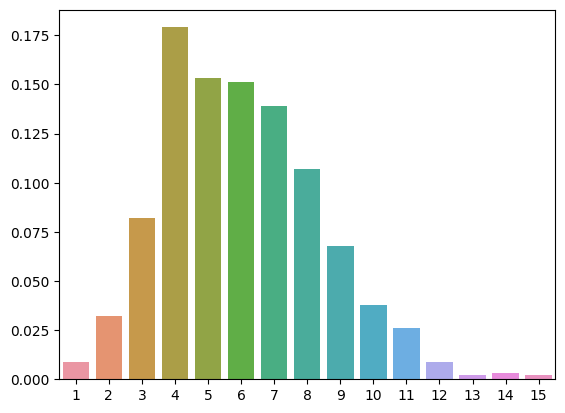

In [435]:
#barplot for unique
for key in list(unique_len.keys()):
    unique_len[key] = unique_len[key]/len(unique_words)
        
sns.barplot(x = list(unique_len.keys()), y = list(unique_len.values()))

### Task 6

In [436]:
s = input().split()
output = ''
for w in s:
    syllables = re.findall(r"[БбВвГгДдЖжЗзЙйКкЛлМмНнПпРрСсТтФфХхЦцЧчШшЩщЬьЪь]*[АаЕеËëИиОоУуЫыЭэЮюЯя]",  w)
    for syl in syllables:
        output += syl+'к'+syl[-1].lower()
    output += ' '
print(output)

Петя Анна
Пекетякя Аканнака 


### Task 7

In [437]:
def find_n_words_sentences(text, number):
    output = []
    regex = re.compile(r'[.|!|?|…]')
    sentences = filter(lambda x: x, [x.strip() for x in regex.split(text)])
    for s in sentences:
        words = re.split(r" ", s)
        if len(words) == number:
            output.append(tuple(words))
    return output

In [438]:
#example
find_n_words_sentences("Здесь три слова. Здесь тоже три", 3)

[('Здесь', 'три', 'слова'), ('Здесь', 'тоже', 'три')]